# Employee Attrition Model
-Jayarani

In [58]:
# importing Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#Import stats library
from scipy.stats import norm

#sklearn modules for feature scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

# sklearn modules for preprocessing - Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sklearn modules for ML model selection

# for splitting dataset to train and test set
from sklearn.model_selection import train_test_split

#for splitting dataset for testing and training set using kfold cross validation
from sklearn.model_selection import KFold

#for finding roc auc score and accuracy value for a given model
from sklearn.model_selection import cross_val_score

#for fine tuning hyperparameters in ML algorithm
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Reading Data

In [2]:
os.chdir("E:\Kaggle\Employee Churn")
hrdata = pd.read_csv("HR-Employee-Attrition.csv")

# Checking for missing values

In [3]:
hrdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Splitting column name based on type of data

In [4]:
type_dct = {str(k): list(v) for k, v in hrdata.groupby(hrdata.dtypes, axis=1)}
intcol = type_dct['int64']
objectcol = type_dct['object']
objectcol.remove("Over18")
intcol.remove("EmployeeCount")
intcol.remove("EmployeeNumber")
intcol.remove("StandardHours")

# Defining function for calculating Percent leavers

In [5]:
def percentleavers(j ,column, columnname):
    df_column = pd.DataFrame(columns =[columnname,"% of Leavers"])
    for i in column:
        lencalc = len(hrdata[(hrdata[columnname]==i)&(hrdata['Attrition']=="Yes")])/len(hrdata[hrdata["Attrition"]=="Yes"])
        df_column.loc[j]= (i,lencalc*100)
        j+=1
    return df_column

# Bivariate Analysis of variables with target variable

In [6]:
"""Since there are no missing values in the data we can directly go for analysis of target variable"""

"""Analysing Categorical Variables"""
Department = list(hrdata["Department"].unique())
df_Department = percentleavers(0, Department,"Department")
BusinessTravel = list(hrdata["BusinessTravel"].unique())
df_BusinessTravel = percentleavers(0, BusinessTravel,"BusinessTravel")
EducationField = list(hrdata["EducationField"].unique())
df_EducationField = percentleavers(0, EducationField,"EducationField")
Gender = list(hrdata["Gender"].unique())
df_Gender= percentleavers(0, Gender,"Gender")
JobRole = list(hrdata["JobRole"].unique())
df_JobRole = percentleavers(0, JobRole,"JobRole")
MaritalStatus = list(hrdata["MaritalStatus"].unique())
df_MaritalStatus = percentleavers(0, MaritalStatus, "MaritalStatus")
OverTime = list(hrdata["OverTime"].unique())
df_OverTime = percentleavers(0, OverTime, "OverTime")


"""Analysing Ordinal Variables"""
JobLevel = list(hrdata["JobLevel"].unique())
df_JobLevel = percentleavers(0,JobLevel,"JobLevel")
JobInvolvement = list(hrdata["JobInvolvement"].unique())
df_JobInvolvement = percentleavers(0,JobInvolvement,"JobInvolvement")
Education = list(hrdata["Education"].unique())
df_Education = percentleavers(0, Education, "Education")
EnvironmentSatisfaction = list(hrdata["EnvironmentSatisfaction"].unique())
df_EnvironmentSatisfaction = percentleavers(0, EnvironmentSatisfaction,"EnvironmentSatisfaction")
JobSatisfaction = list(hrdata["JobSatisfaction"].unique())
df_JobSatisfaction = percentleavers(0, JobSatisfaction,"JobSatisfaction")
PerformanceRating = list(hrdata["PerformanceRating"].unique())
df_PerformanceRating = percentleavers(0, PerformanceRating, "PerformanceRating")
RelationshipSatisfaction=list(hrdata["RelationshipSatisfaction"].unique())
df_RelationshipSatisfaction= percentleavers(0, RelationshipSatisfaction,"RelationshipSatisfaction")
StockOptionLevel= list(hrdata["StockOptionLevel"].unique())
df_StockOptionLevel = percentleavers(0, StockOptionLevel, "StockOptionLevel")
WorkLifeBalance= list(hrdata["WorkLifeBalance"].unique())
df_WorkLifeBalance = percentleavers(0, WorkLifeBalance, "WorkLifeBalance")

# Comparing the columns Education and EducationField

In [7]:
depedempdf = pd.DataFrame(columns = ["Education","EducationField","noofemp"])
k = 0
for i in Education:
    for j in EducationField:
        depedempdf.loc[k]= (i,j,len(hrdata[(hrdata["Education"]==i)&(hrdata['EducationField']==j)])/1)
        k = k+1

ii = depedempdf.pivot(index = "Education",columns ="EducationField")
ii

noofemp                                        \
EducationField Human Resources Life Sciences Marketing Medical Other   
Education                                                              
1                          2.0          67.0      14.0    63.0   5.0   
2                          2.0         116.0      24.0    99.0  19.0   
3                         16.0         233.0      59.0   183.0  24.0   
4                          5.0         173.0      52.0   104.0  33.0   
5                          2.0          17.0      10.0    15.0   1.0   

                                 
EducationField Technical Degree  
Education                        
1                          19.0  
2                          22.0  
3                          57.0  
4                          31.0  
5                           3.0

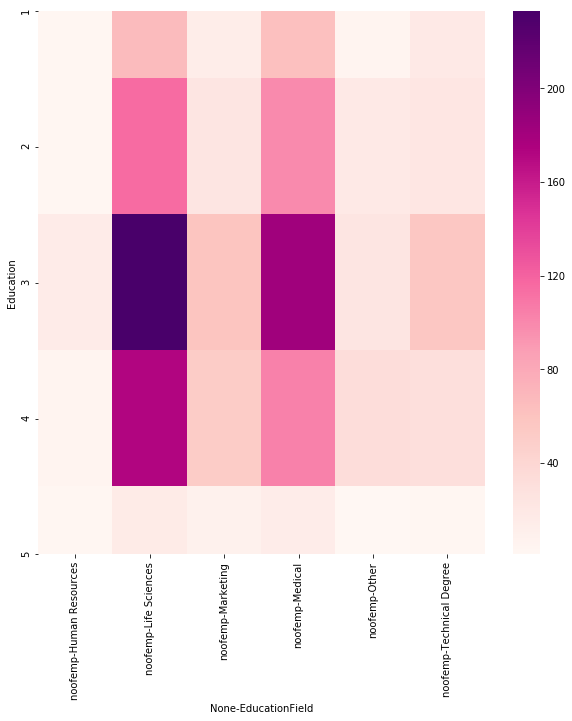

In [8]:
plt.figure(figsize =(10,10))
sns.heatmap(data = ii,cmap = "RdPu")
plt.show()

# Comparing JobSatisfaction with Department based on Attrition

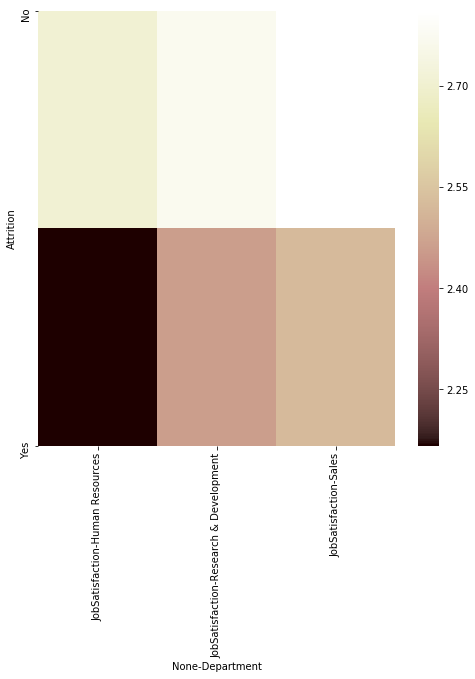

In [10]:
df_test = hrdata[["JobSatisfaction","Department","Attrition"]]
df_grp = df_test.groupby(["Department","Attrition"], as_index =False).mean()
df_pivot = df_grp.pivot(index = "Attrition",columns ="Department")
plt.figure(figsize=(8,8))
sns.heatmap(data = df_pivot,cmap = 'pink')
plt.show()

In [12]:
df_pivot

JobSatisfaction                                 
Department Human Resources Research & Development     Sales
Attrition                                                  
No                2.705882               2.769324  2.810734
Yes               2.166667               2.458647  2.521739

# Comparing JobSatisfaction and Attrition

In [20]:
jobattri = hrdata[["JobSatisfaction","Attrition"]]
jobattrigrp = jobattri.groupby(["Attrition"],as_index =False).mean()
jobattrigrp

,Attrition,JobSatisfaction
0,No,2.778589
1,Yes,2.468354


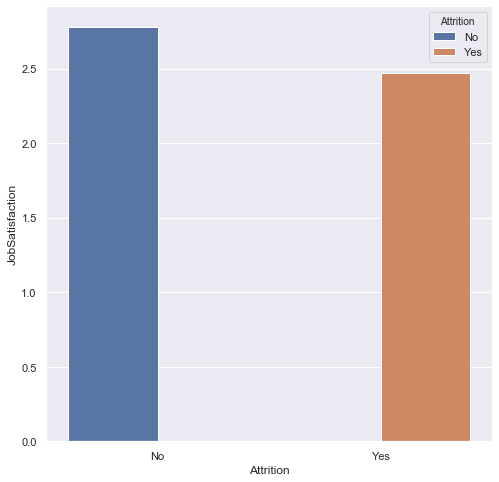

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x = "Attrition",y = "JobSatisfaction",data = jobattrigrp, hue ="Attrition", hue_order=jobattrigrp["Attrition"])
plt.show()

# Comparing Monthly Income with Attrition

In [26]:
inattri = hrdata[["MonthlyIncome","Attrition"]]
inattrigrp = inattri.groupby(["Attrition"],as_index =False).mean()
inattrigrp

,Attrition,MonthlyIncome
0,No,6832.739659
1,Yes,4787.092827


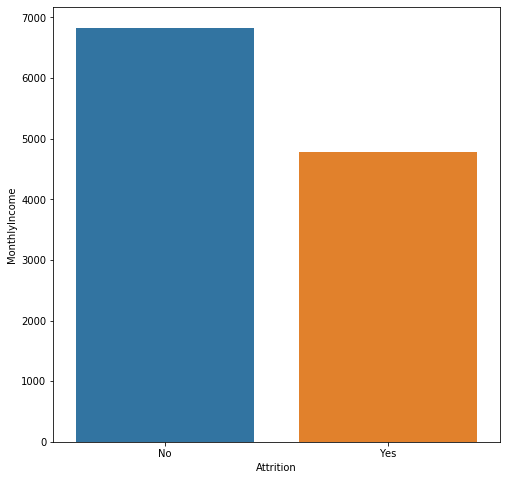

In [27]:
plt.figure(figsize=(8,8))
sns.barplot(x = "Attrition",y = "MonthlyIncome",data = inattrigrp)
plt.show()

# Comparing the columns Jobrole and JobSatisfaction

In [13]:
jobdf = pd.DataFrame(columns = ["JobRole","JobSatisfaction","noofemp"])
k = 0
for i in JobRole:
    for j in JobSatisfaction:
        jobdf.loc[k]= (i,j,len(hrdata[(hrdata["JobRole"]==i)&(hrdata['JobSatisfaction']==j)])/1)
        k = k+1

jj = jobdf.pivot(index = "JobSatisfaction",columns ="JobRole")
jj

noofemp                  \
JobRole         Healthcare Representative Human Resources   
JobSatisfaction                                             
1                                    26.0            10.0   
2                                    19.0            16.0   
3                                    43.0            13.0   
4                                    43.0            13.0   

                                                                      \
JobRole         Laboratory Technician Manager Manufacturing Director   
JobSatisfaction                                                        
1                                56.0    21.0                   26.0   
2                                48.0    21.0                   32.0   
3                                75.0    27.0                   49.0   
4                                80.0    33.0                   38.0   

                                                                      \
JobRole         Research Director Research Scientist Sales Executive   
JobSatisfaction                                                        
1                            15.0               54.0            69.0   
2                            16.0               53.0            54.0   
3                            27.0               90.0            91.0   
4                            22.0               95.0           112.0   

                                      
JobRole         Sales Representative  
JobSatisfaction                       
1                               12.0  
2                               21.0  
3                               27.0  
4                               23.0

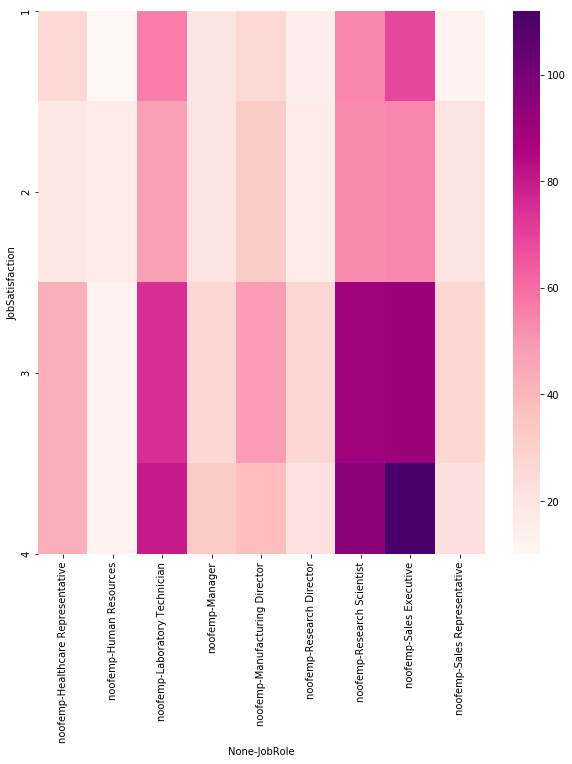

In [14]:
plt.figure(figsize =(10,10))
sns.heatmap(data = jj,cmap = "RdPu")
plt.show()

# Plotting Categorical And Ordinal variables based on Attrition

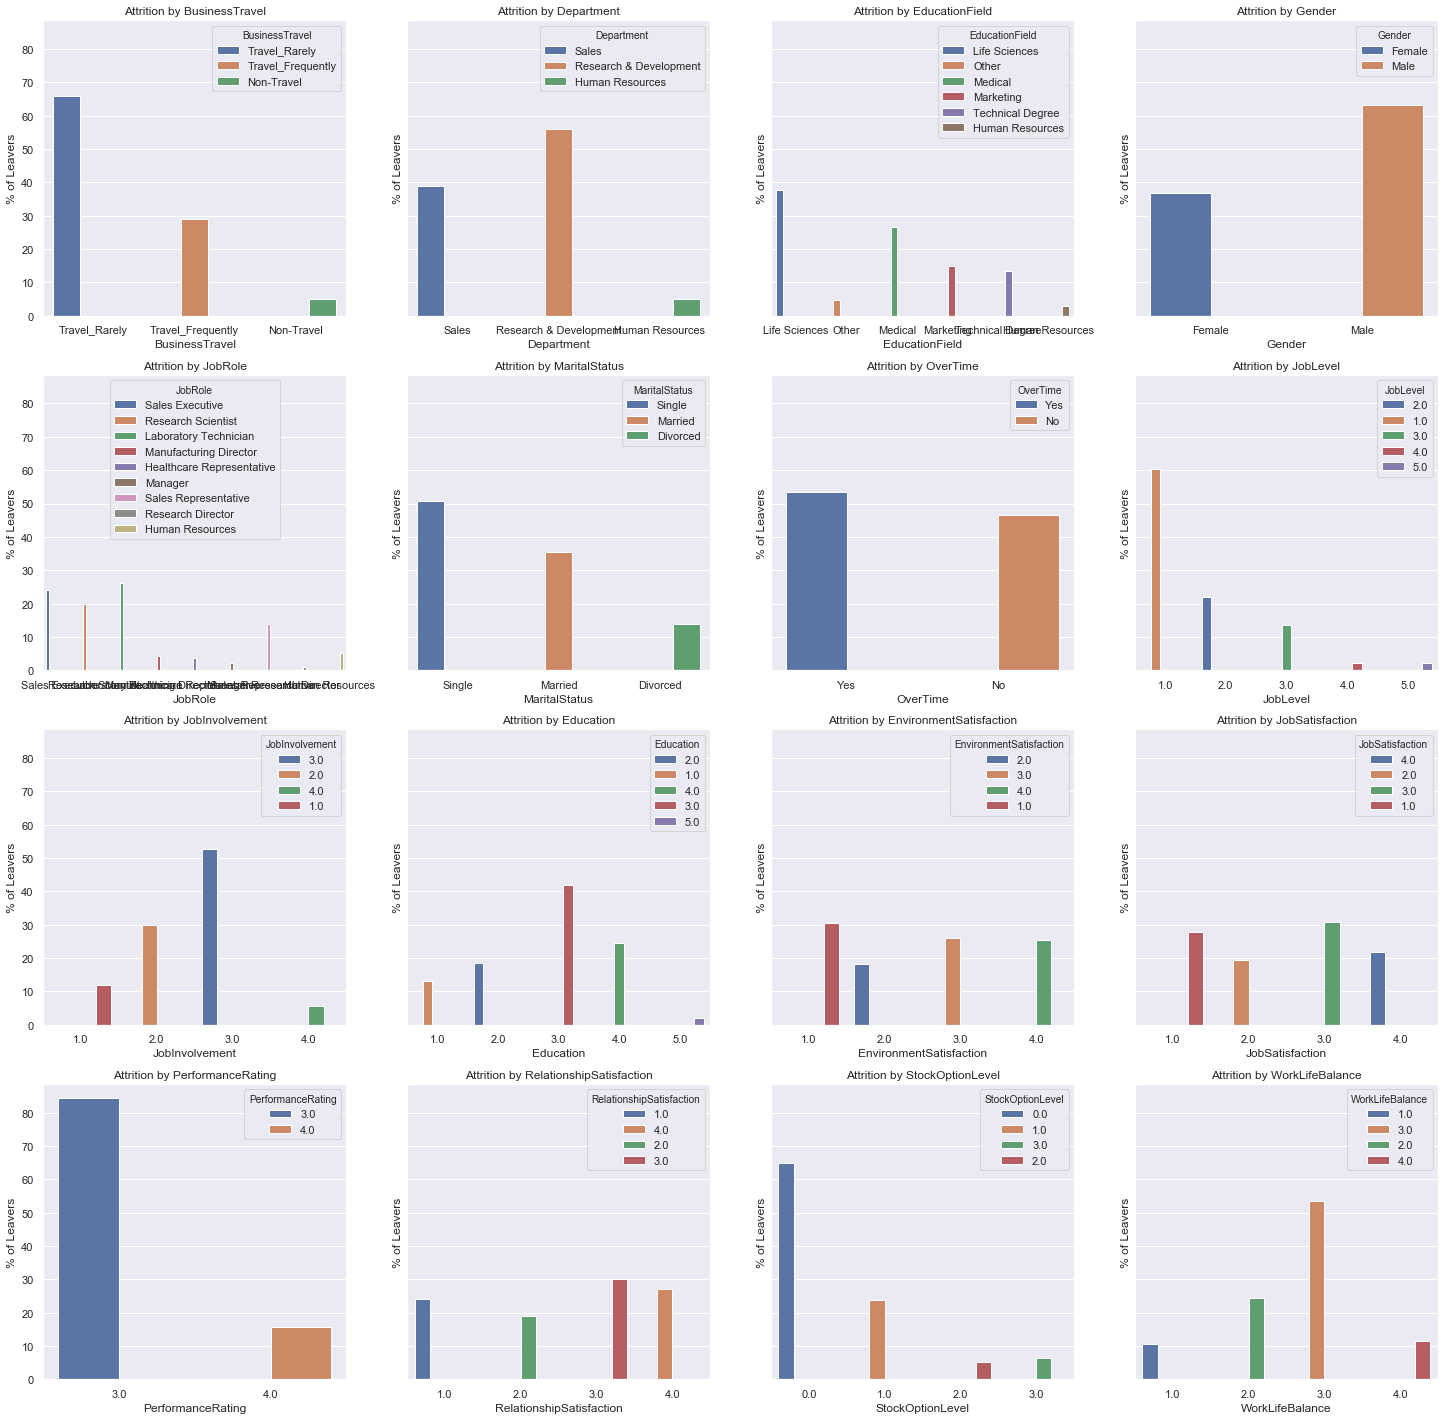

In [28]:
sns.set()
fig, ax = plt.subplots(4,4,sharey = True, figsize = (25,25))
sns.barplot(ax=ax[0][0],data = df_BusinessTravel, x = "BusinessTravel", y = "% of Leavers", hue = "BusinessTravel", hue_order=df_BusinessTravel["BusinessTravel"])
ax[0][0].set_title("Attrition by BusinessTravel")
sns.barplot(ax=ax[0][1],data = df_Department, x = "Department", y = "% of Leavers", hue = "Department", hue_order=df_Department["Department"])
ax[0][1].set_title("Attrition by Department")
sns.barplot(ax=ax[0][2],data = df_EducationField, x = "EducationField", y = "% of Leavers", hue = "EducationField", hue_order=df_EducationField["EducationField"])
ax[0][2].set_title("Attrition by EducationField")
sns.barplot(ax=ax[0][3],data = df_Gender, x = "Gender", y = "% of Leavers", hue = "Gender", hue_order=df_Gender["Gender"])
ax[0][3].set_title("Attrition by Gender")
sns.barplot(ax=ax[1][0],data = df_JobRole, x = "JobRole", y = "% of Leavers", hue = "JobRole", hue_order=df_JobRole["JobRole"])
ax[1][0].set_title("Attrition by JobRole")
sns.barplot(ax=ax[1][1],data = df_MaritalStatus, x = "MaritalStatus", y = "% of Leavers", hue = "MaritalStatus", hue_order=df_MaritalStatus["MaritalStatus"])
ax[1][1].set_title("Attrition by MaritalStatus")
sns.barplot(ax=ax[1][2],data = df_OverTime, x = "OverTime", y = "% of Leavers", hue = "OverTime", hue_order=df_OverTime["OverTime"])
ax[1][2].set_title("Attrition by OverTime")
sns.barplot(ax=ax[1][3],data = df_JobLevel, x = "JobLevel", y = "% of Leavers", hue = "JobLevel", hue_order=df_JobLevel["JobLevel"])
ax[1][3].set_title("Attrition by JobLevel")
sns.barplot(ax=ax[2][0],data = df_JobInvolvement, x = "JobInvolvement", y = "% of Leavers", hue = "JobInvolvement", hue_order=df_JobInvolvement["JobInvolvement"])
ax[2][0].set_title("Attrition by JobInvolvement")
sns.barplot(ax=ax[2][1],data = df_Education, x = "Education", y = "% of Leavers", hue = "Education", hue_order=df_Education["Education"])
ax[2][1].set_title("Attrition by Education")
sns.barplot(ax=ax[2][2],data = df_EnvironmentSatisfaction, x = "EnvironmentSatisfaction", y = "% of Leavers", hue = "EnvironmentSatisfaction", hue_order=df_EnvironmentSatisfaction["EnvironmentSatisfaction"])
ax[2][2].set_title("Attrition by EnvironmentSatisfaction")
sns.barplot(ax=ax[2][3],data = df_JobSatisfaction, x = "JobSatisfaction", y = "% of Leavers", hue = "JobSatisfaction", hue_order=df_JobSatisfaction["JobSatisfaction"])
ax[2][3].set_title("Attrition by JobSatisfaction")
sns.barplot(ax=ax[3][0],data = df_PerformanceRating, x = "PerformanceRating", y = "% of Leavers", hue = "PerformanceRating", hue_order=df_PerformanceRating["PerformanceRating"])
ax[3][0].set_title("Attrition by PerformanceRating")
sns.barplot(ax=ax[3][1],data = df_RelationshipSatisfaction, x = "RelationshipSatisfaction", y = "% of Leavers", hue = "RelationshipSatisfaction", hue_order=df_RelationshipSatisfaction["RelationshipSatisfaction"])
ax[3][1].set_title("Attrition by RelationshipSatisfaction")
sns.barplot(ax=ax[3][2],data = df_StockOptionLevel, x = "StockOptionLevel", y = "% of Leavers", hue = "StockOptionLevel", hue_order=df_StockOptionLevel["StockOptionLevel"])
ax[3][2].set_title("Attrition by StockOptionLevel")
sns.barplot(ax=ax[3][3],data = df_WorkLifeBalance, x = "WorkLifeBalance", y = "% of Leavers", hue = "WorkLifeBalance", hue_order=df_WorkLifeBalance["WorkLifeBalance"])
ax[3][3].set_title("Attrition by WorkLifeBalance")
plt.show()

# Univariate and Bivariate Analysis of Numerical Variables

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


Text(0.5, 1.0, 'Age Distribution in Percent by Attrition Status')

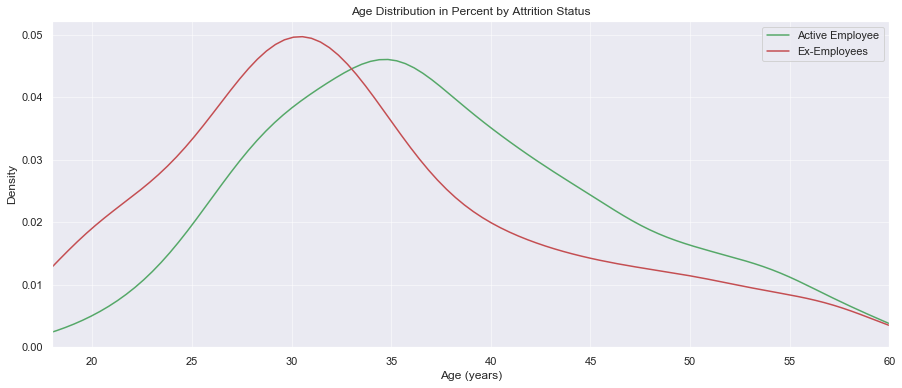

In [35]:
"""Analysing the variable Age"""
(mu, sigma) = norm.fit(hrdata.loc[hrdata['Attrition'] == 'Yes', 'Age'])
print('Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(hrdata.loc[hrdata['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'Age'], label = 'Active Employee', color = 'g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees',color ='r')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status')

Distance from home for employees to get to work is from 1 to 29 miles.


Text(0.5, 1.0, 'Distance From Home Distribution in Percent by Attrition Status')

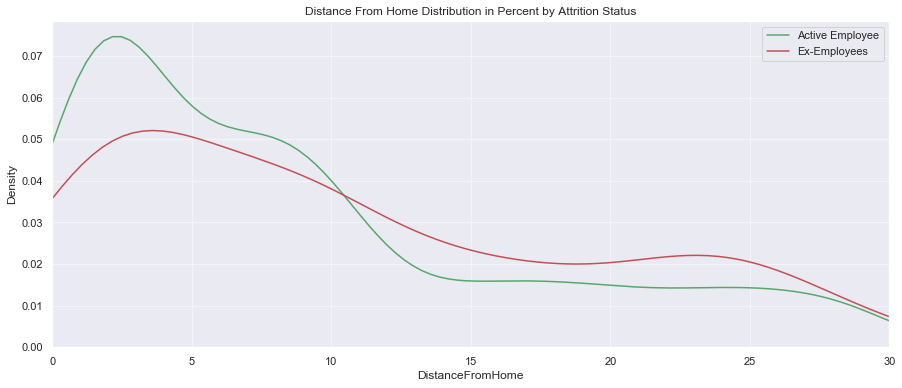

In [36]:
"""Distance from Home"""
print("Distance from home for employees to get to work is from {} to {} miles.".format(hrdata['DistanceFromHome'].min(),
                                                                                       hrdata['DistanceFromHome'].max()))
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee',color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees',color = 'r')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0,right=30)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status')

Percentage Salary Hikes varies from 11% to 25%.


Text(0.5, 1.0, 'Percent Salary Hike in Percent by Attrition Status')

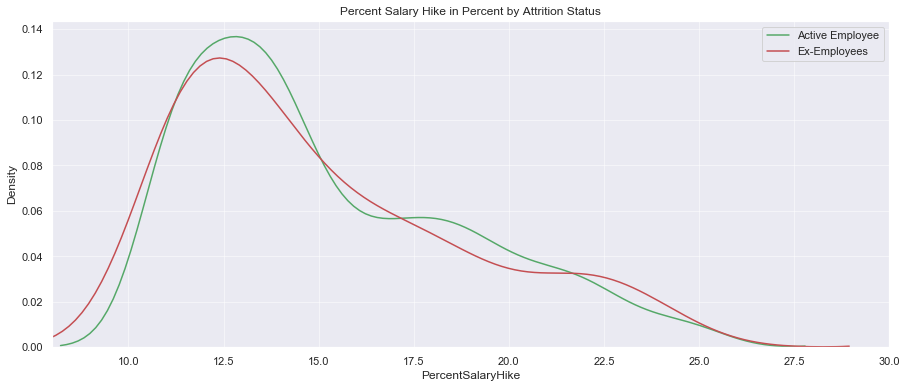

In [37]:
"""Percentage Salary Hike"""

print("Percentage Salary Hikes varies from {}% to {}%.".format(hrdata['PercentSalaryHike'].min(), hrdata['PercentSalaryHike'].max()))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee',color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees', color ='r')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=8, right = 30)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status')

Text(0.5, 1.0, 'TotalWorkingYears Distribution in Percent by Attrition Status')

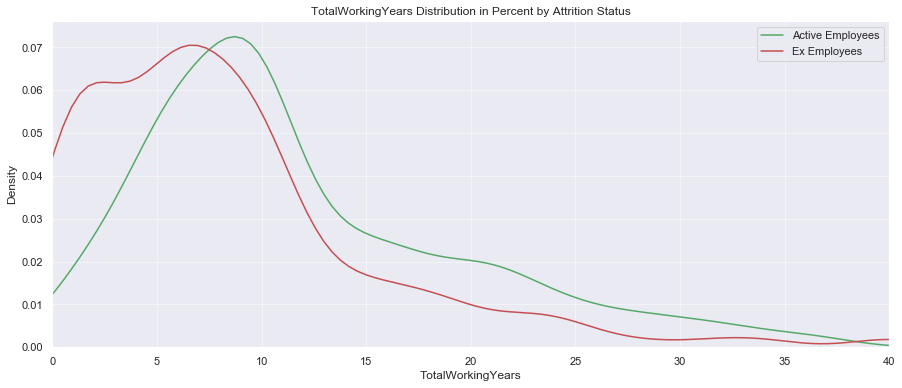

In [38]:
"""Total Working Years"""
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'TotalWorkingYears'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'TotalWorkingYears'], label ="Ex Employees",color = 'r')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0,right=40)
plt.ylabel('Density')
plt.title('TotalWorkingYears Distribution in Percent by Attrition Status')

Training times last year max = 6


Text(0.5, 1.0, 'TrainingTimesLastYear Distribution in Percent by Attrition Status')

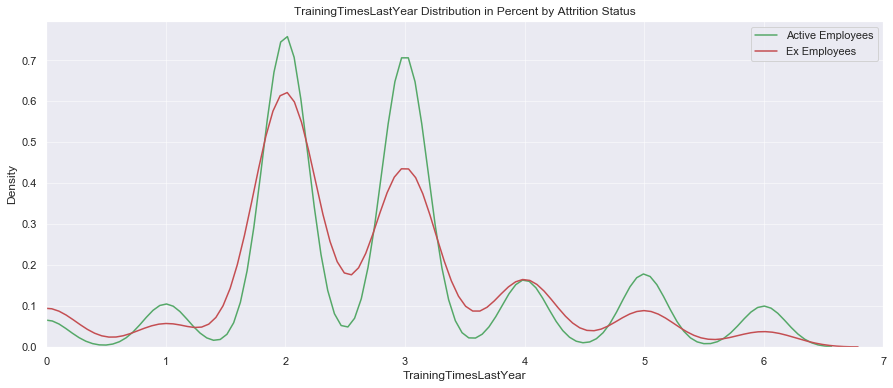

In [39]:
"""Training times Last Year"""
print("Training times last year max =", hrdata['TrainingTimesLastYear'].max())

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'TrainingTimesLastYear'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label ="Ex Employees",color = 'r')
plt.xlabel('TrainingTimesLastYear')
plt.xlim(left=0,right=7)
plt.ylabel('Density')
plt.title('TrainingTimesLastYear Distribution in Percent by Attrition Status')

YearsAtCompany max 40


Text(0.5, 1.0, 'YearsAtCompany Distribution in Percent by Attrition Status')

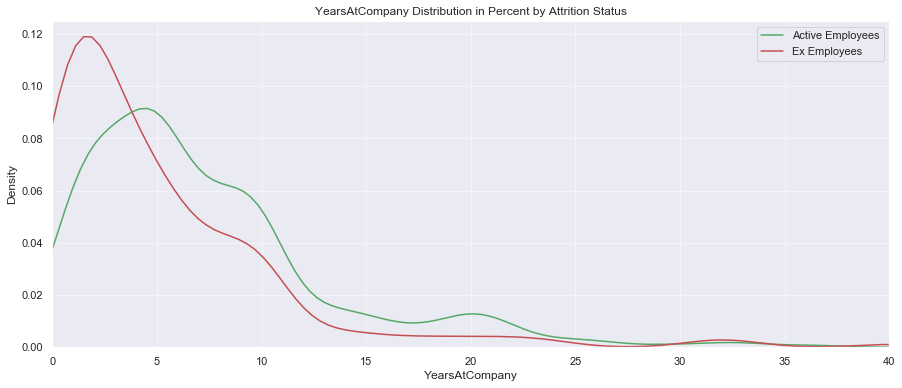

In [40]:
"""Years at company"""
print( 'YearsAtCompany max',hrdata[ 'YearsAtCompany'].max())
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'YearsAtCompany'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'YearsAtCompany'], label ="Ex Employees",color = 'r')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0,right=40)
plt.ylabel('Density')
plt.title('YearsAtCompany Distribution in Percent by Attrition Status')

Text(0.5, 1.0, 'YearsInCurrentRole Distribution in Percent by Attrition Status')

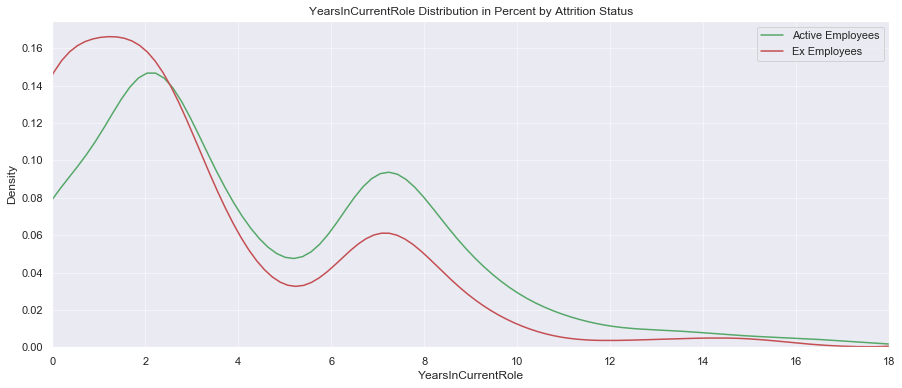

In [41]:
"""Years in Current Role"""
hrdata['YearsInCurrentRole'].max()
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'YearsInCurrentRole'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'YearsInCurrentRole'], label ="Ex Employees",color = 'r')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0,right=18)
plt.ylabel('Density')
plt.title('YearsInCurrentRole Distribution in Percent by Attrition Status')

Text(0.5, 1.0, 'YearsSinceLastPromotion Distribution in Percent by Attrition Status')

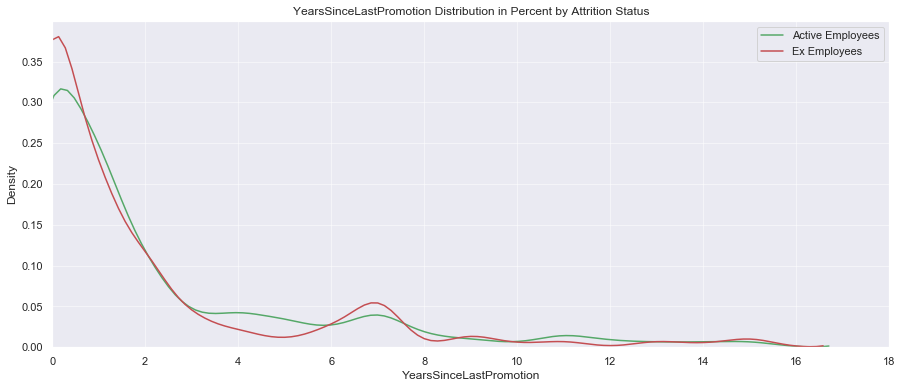

In [42]:
"""Years since last promotion"""
hrdata["YearsSinceLastPromotion"].max()
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'YearsSinceLastPromotion'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label ="Ex Employees",color = 'r')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0,right=18)
plt.ylabel('Density')
plt.title('YearsSinceLastPromotion Distribution in Percent by Attrition Status')

Text(0.5, 1.0, 'YearsWithCurrManager Distribution in Percent by Attrition Status')

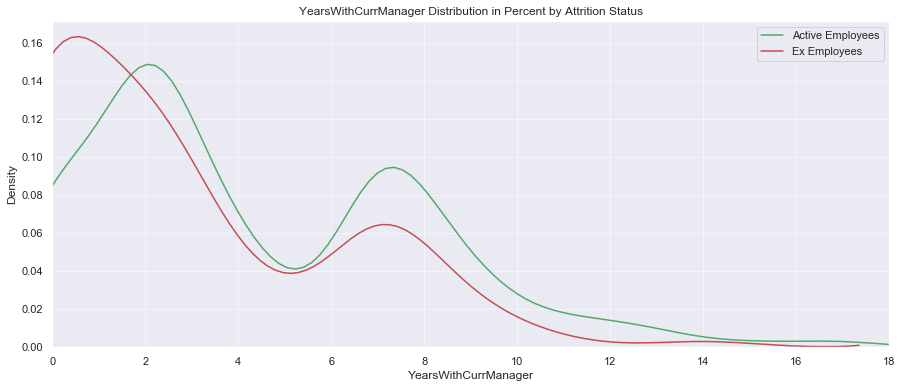

In [43]:
"""Years with current Manager"""
hrdata["YearsWithCurrManager"].max()
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'YearsWithCurrManager'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'YearsWithCurrManager'], label ="Ex Employees",color = 'r')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0,right=18)
plt.ylabel('Density')
plt.title('YearsWithCurrManager Distribution in Percent by Attrition Status')

Text(0.5, 1.0, 'NumCompaniesWorked Distribution in Percent by Attrition Status')

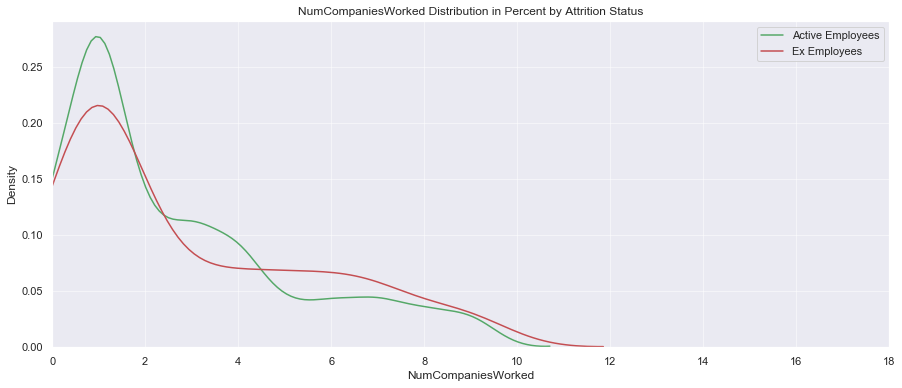

In [44]:
"""Number of companies worked"""
hrdata[["NumCompaniesWorked"]].max()
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'NumCompaniesWorked'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'NumCompaniesWorked'], label ="Ex Employees",color = 'r')
plt.xlabel('NumCompaniesWorked')
plt.xlim(left=0,right=18)
plt.ylabel('Density')
plt.title('NumCompaniesWorked Distribution in Percent by Attrition Status')

Text(0.5, 1.0, 'MonthlyIncome Distribution in Percent by Attrition Status')

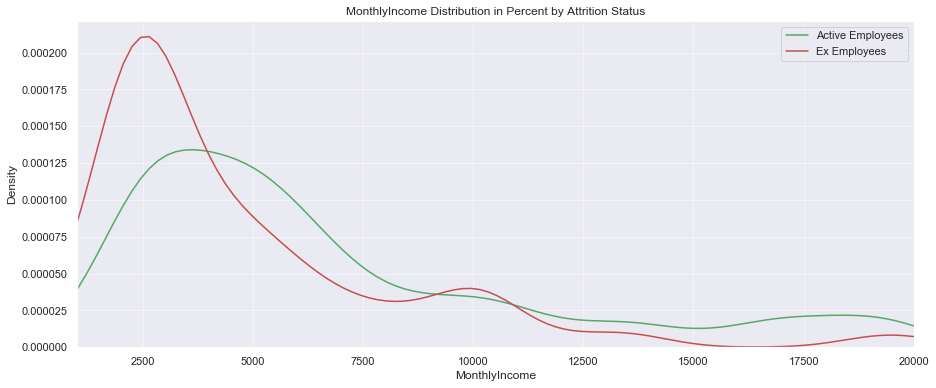

In [45]:
"""Monthly Income"""
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'No', 'MonthlyIncome'], label ="Active Employees",color ='g')
sns.kdeplot(hrdata.loc[hrdata['Attrition'] == 'Yes', 'MonthlyIncome'], label ="Ex Employees",color = 'r')
plt.xlabel('MonthlyIncome')
plt.xlim(left=1000,right=20000)
plt.ylabel('Density')
plt.title('MonthlyIncome Distribution in Percent by Attrition Status')

# Encoding Categorical Variables

In [42]:
hrdatacopy = hrdata.copy()
le = LabelEncoder()
"""Converting CCategorical Attrition Column to Numerical Target Column"""
hrdatacopy['Target'] = hrdatacopy['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
hrdatacopy = hrdatacopy.drop(columns =["Attrition"])

"""Label Encoding followed by One hot encoding for the Categorical Variable Gender"""
le.fit(hrdatacopy["Gender"])
Genderencode = pd.DataFrame(le.transform(hrdatacopy['Gender']))
Genderonehot = OneHotEncoder(categories="auto").fit_transform(Genderencode).toarray()
hrdatacopy = hrdatacopy.join(pd.DataFrame(Genderonehot, columns = ["Female","Male"]))
hrdatacopy= hrdatacopy.drop(columns =["Gender","Female"])

"""Label Encoding followed by One hot encoding for the Categorical Variable OverTime"""
le.fit(hrdatacopy["OverTime"])
OverTimeencode = pd.DataFrame(le.transform(hrdata["OverTime"]))
OverTimeonehot = OneHotEncoder(categories="auto").fit_transform(OverTimeencode).toarray()
hrdatacopy= hrdatacopy.join(pd.DataFrame(OverTimeonehot,columns =["NoOverTime","YesOverTime"]))
hrdatacopy = hrdatacopy.drop(columns =["OverTime","NoOverTime"])

"""Dropping Unwanted Columns for predictive model"""
hrdatacopy= hrdatacopy.drop(columns = ["Over18","StandardHours","EmployeeCount","EmployeeNumber"])

In [47]:
"""A for loop for finding left out Categorical Variables for Encoding"""
i = 1
for col in hrdatacopy.columns:
    if hrdatacopy[col].dtypes =="object":
        print(i,col,hrdatacopy[col].unique())
        i+=1

In [52]:
"""Grouping Columns by dtypes"""
type_dct = {str(k): list(v) for k, v in hrdatacopy.groupby(hrdatacopy.dtypes, axis=1)}
type_dct

{'int64': ['Target'],
 'float64': ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager',
  'Male',
  'YesOverTime',
  'BusinessTravel_Travel_Frequently',
  'BusinessTravel_Travel_Rarely',
  'Department_Research & Development',
  'Department_Sales',
  'EducationField_Life Sciences',
  'EducationField_Marketing',
  'EducationField_Medical',
  'EducationField_Other',
  'EducationField_Technical Degree',
  'JobRole_Human Resources',
  'JobRole_Laboratory Technician',
  'JobRole_Manager',
  'JobRole_Manufacturing Director',
  'JobRole_Research Director',
  'JobRole_

In [45]:
"""Using pandas.get_dummies() ito convert remaining categorical data into dummy or indicator variables."""
hrdatacopy = pd.get_dummies(hrdatacopy,drop_first=True)
hrdatacopy.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,1,0,0,0,0,0,0,1,0


# Feature Scaling of Numerical Variables

In [48]:
#Min MAx Scaler or Normalization
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(hrdatacopy.columns)
HR_col.remove('Target')
HR_col.remove('Male') #As it is already one hot encoded
HR_col.remove("YesOverTime")#As it is already one hot encoded
for col in HR_col:
    hrdatacopy[col] = hrdatacopy[col].astype(float)
    hrdatacopy[[col]] = scaler.fit_transform(hrdatacopy[[col]])
hrdatacopy.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,1.666667,4.571429,3.333333,1.25,5.000000,1.312270,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,3.333333,2.214286,1.666667,1.25,1.666667,1.085045,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,5.000000,4.428571,1.666667,0.00,3.333333,0.284623,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,5.000000,1.857143,3.333333,0.00,3.333333,0.500263,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.000000,0.714286,3.333333,0.00,1.666667,0.647446,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


# Splitting Data to Training and Test Set

In [53]:
target = hrdatacopy['Target'].copy()
hrdatacopy= hrdatacopy.drop(columns =["Target"])
X_train, X_test, y_train, y_test = train_test_split(hrdatacopy,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


# Building Machine Learning Models

In [54]:
"""We have to classify employees as Attrition and No attrition. Our dataset can be predicted using a 
supervised classification model as the predictor are discrete values and can be trained using training set.
And they can be evaluated using Confusion Matrix since it is a classification model."""

# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


"""Performance Measures by calculating Accuracy and ROC AUC Score"""
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)  # 10-fold cross-validation for splitting train and test data

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.97,8.05,74.67,5.28
1,Random Forest,78.69,8.06,85.57,3.83
5,Gaussian NB,75.06,5.10,68.14,3.14
2,SVM,70.88,8.16,84.21,4.34
3,KNN,61.15,8.41,84.11,3.98
4,Decision Tree Classifier,59.26,5.59,76.67,4.68


In [ ]:
"""Reviewing the above scores from  all selected base line algorithms, It is observed that Logistic Regression and 
Random Forest Classifier produces best ROC AUC and Accuracy ."""

# Logistic Regression

In [56]:
"AUC SCORE obtained for Logistic Regression using 10 folds cross validation"
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',class_weight="balanced", random_state=7)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='roc_auc')
# cross_val_score is a function used to evaluate the score of a model using cross validation
#print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))
print("AUC Score mean is", round(results.mean()*100,2),"%")
print("AUC STD is ", round(results.std()*100,2),"%")
resultsacc = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy mean is", round(resultsacc.mean()*100,2),"%")
print("Accuracy STD is ", round(resultsacc.std()*100,2),"%")

AUC Score mean is 81.97 %
AUC STD is  8.05 %
Accuracy mean is 74.67 %
Accuracy STD is  5.28 %


# Fine Tuning Hyper Parameters for Logistic Regression

In [60]:
"""Let us fine tune them using Grid Search CV to achieve better results"""
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20) 

best params: LogisticRegression(C=1.8009999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.8009999999999997}
best score: 0.8173372866148569


# Accuracy And AUC Score for fine tuned Logistic regression model using Gridsearch best estimator

In [66]:
"""Accuracy"""
print("Accuracy is " ,round(log_opt.score(X_test, y_test)*100,2),"%")
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score is', round(logit_roc_auc*100,2),"%")

Accuracy is  75.0 %
AUC score is 85.31 %


# Confusion Matrix for Logistic Regression with Gridsearch

Text(0.5, 257.44, 'Predicted label')

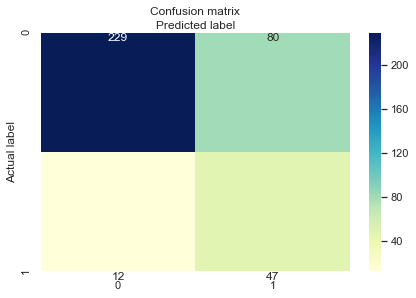

In [98]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
akws = {"ha": 'center',"va": 'top'}
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt ='g',annot_kws=akws)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report for Logistic Regression with Grid Search

In [100]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       309
           1       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



# Random Forest Classifier

In [104]:
"""AUC SCORE obtained for Random Forest Classifier using 10 folds cross validation"""
kfold = model_selection.KFold(n_splits=10, random_state=7)
rf_classifier = RandomForestClassifier(class_weight = "balanced",random_state=7, n_estimators=175)
results = model_selection.cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
# cross_val_score is a function used to evaluate the score of a model using cross validation
#print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))
print("AUC Score mean is", (round(results.mean(),4)*100),"%")
print("AUC STD is ", round(results.std()*100,2),"%")
resultsacc = model_selection.cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy mean is", (round(resultsacc.mean(),4)*100),"%")
print("Accuracy STD is ", round(resultsacc.std()*100,2),"%")

AUC Score mean is 78.7 %
AUC STD is  6.53 %
Accuracy mean is 85.03 %
Accuracy STD is  4.04 %


# Fine tuning Random Forest Classfier using Grid Search CV

In [106]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=175, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 175}
best score: 0.7880730895246808


# Accuracy And AUC Score for fine tuned Random Forest Classification model using Gridsearch best estimator

In [113]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score is' , round(rf_opt_roc_auc*100,2),"%")
print("Accuracy is " ,round(rf_opt.score(X_test, y_test)*100,2),"%")

AUC score is 81.6 %
Accuracy is  85.6 %


# Classification Report for Random Forest Classification with Grid Search

In [108]:
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.62      0.25      0.36        59

    accuracy                           0.86       368
   macro avg       0.75      0.61      0.64       368
weighted avg       0.83      0.86      0.83       368



# Confusion Matrix for Random Forest Classification with Gridsearch

Text(0.5, 257.44, 'Predicted label')

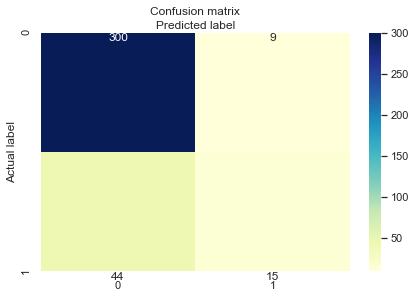

In [109]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
akws = {"ha": 'center',"va": 'top'}
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt ='g',annot_kws=akws)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Plotting Important Features

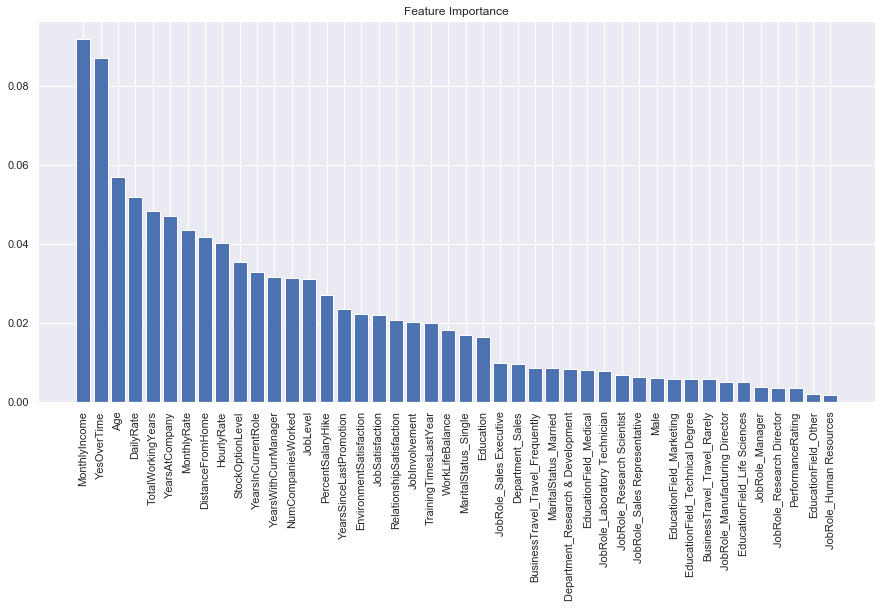

In [110]:
"""Random Forest Classifier helps to identify important features using the method feature_importances_"""

importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [111]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.091913
1,YesOverTime,0.087142
2,Age,0.056939
3,DailyRate,0.051839
4,TotalWorkingYears,0.048481
5,YearsAtCompany,0.047205
6,MonthlyRate,0.043417
7,DistanceFromHome,0.041874
8,HourlyRate,0.040154
9,StockOptionLevel,0.035526


# ROC Graph

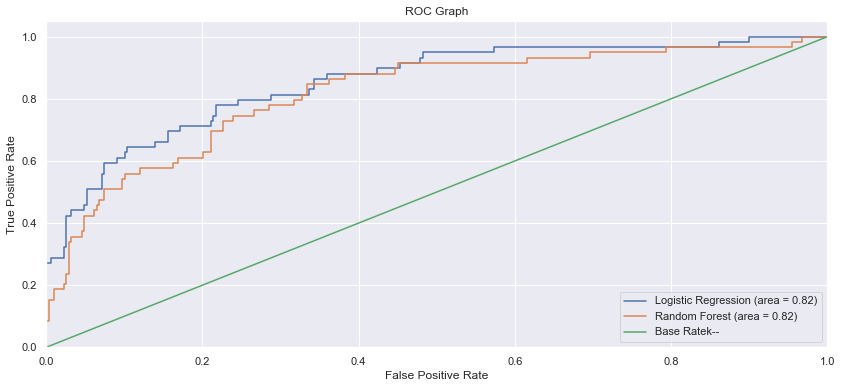

In [114]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()